<a href="https://colab.research.google.com/github/SChiu-project/CUSCS-m3/blob/main/Class3_Nearest_Neighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nearest Neighbors

The principle behind nearest neighbor methods is to find a predefined number of training samples closest in distance to the new point, and predict the label from these. The number of samples can be a user-defined constant (k-nearest neighbor learning), or vary based on the local density of points (radius-based neighbor learning). The distance can, in general, be any metric measure: standard Euclidean distance is the most common choice. Neighbors-based methods are known as non-generalizing machine learning methods, since they simply “remember” all of its training data (possibly transformed into a fast indexing structure such as a Ball Tree or KD Tree).

Despite its simplicity, nearest neighbors has been successful in a large number of classification and regression problems, including handwritten digits and satellite image scenes. Being a non-parametric method, it is often successful in classification situations where the decision boundary is very irregular.

The classes in sklearn.neighbors can handle either NumPy arrays or scipy.sparse matrices as input. For dense matrices, a large number of possible distance metrics are supported. For sparse matrices, arbitrary Minkowski metrics are supported for searches.

KNeighborsRegressor
- Regression based on k-nearest neighbors.

NearestNeighbors
- Unsupervised learner for implementing neighbor searches.

RadiusNeighborsClassifier
- Classifier based on neighbors within a fixed radius.

RadiusNeighborsRegressor
- Regression based on neighbors within a fixed radius.

## KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print(knn.predict([[1.1]]))
print(knn.predict_proba([[0.9]]))

[0]
[[0.66666667 0.33333333]]


## Classwork

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [ ]:
iris = datasets.load_iris()

In [ ]:
X = iris.data
y = iris.target

In [ ]:
X[0:3]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2]])

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X, y)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(X_test)
print(pred)

[2 1 0 0 1 2 2 1 0 2 2 2 2 2 1 0 1 2 0 2 0 0 1 1 1 2 0 0 2 0]


In [ ]:
print(y_test)

[1 1 0 0 1 2 2 1 0 2 2 2 2 2 1 0 1 2 0 2 0 0 1 1 1 1 0 0 2 0]


In [ ]:
print((pred == y_test).sum()/len(y_test))

0.9333333333333333


## Random data

In [ ]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

centers = [[2, 3], [5, 5], [1, 8]]
n_classes = len(centers)
data, labels = make_blobs(n_samples=150,
                          centers=np.array(centers),
                          random_state=1)
print(type(data))
print(data[:5])
print(labels[:5])

<class 'numpy.ndarray'>
[[-0.23685338  8.87583893]
 [ 1.01652757  8.17718772]
 [ 2.55880554  8.1094027 ]
 [ 4.86355526  4.88094581]
 [ 6.12141771  5.40890054]]
[2 2 2 1 1]


In [ ]:
print(np.unique(labels))

[0 1 2]


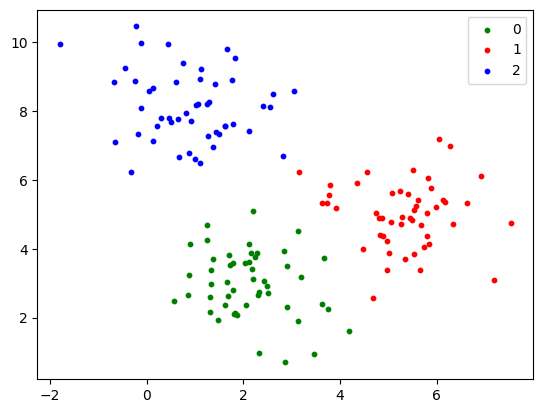

In [ ]:
import matplotlib.pyplot as plt

colours = ('green', 'red', 'blue')
n_classes = 3

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0],
               data[labels==n_class, 1],
               c=colours[n_class], s=10,
               label=str(n_class))

ax.legend(loc='upper right');

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)

In [ ]:
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

predict = knn.predict(X_test)
print("Predictions from the classifier:")
print(predict)
print("Target values:")
print(y_test)

Predictions from the classifier:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]
Target values:
[2 2 2 0 0 1 1 2 2 1 0 1 0 0 2 0 0 0 1 0 0 1 1 2 0 0 0 1 2 1]


In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(predict, y_test))

1.0


In [ ]:
knn = KNeighborsClassifier(algorithm='auto',
                           leaf_size=30,
                           metric='minkowski',
                           p=2,
                           metric_params=None,
                           n_jobs=1,
                           n_neighbors=5,
                           weights='uniform')

In [ ]:
predict = knn.predict(np.array([[3., 3.]]))
print(predict)

[0]


In [ ]:
predict = knn.predict(np.array([[5., 5.]]))
print(predict)

[1]


In [ ]:
predict = knn.predict(np.array([[5., 10.]]))
print(predict)

[2]


## iris

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

dataset = datasets.load_iris()
X, y = dataset.data, dataset.target
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
# classifier "out of the box", no parameters
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

print("Predictions from the classifier:")
predict = knn.predict(X_test)
print(predict)
print("Target values:")
print(y_test)

Predictions from the classifier:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 2 0 1 2 1 0 2 1 1 0 0]
Target values:
[0 2 0 1 2 2 2 0 2 0 1 0 0 0 1 2 2 1 0 1 0 1 2 1 0 2 1 1 0 0]


In [ ]:
print(metrics.accuracy_score(predict, y_test))

0.9666666666666667


In [ ]:
print("Predictions from the classifier:")
predict = knn.predict(X_train)
print(predict)
print("Target values:")
print(y_train)
print(accuracy_score(predict, y_train))

Predictions from the classifier:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 1 2 2 1
 1 1 2 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 2 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]
Target values:
[0 1 2 0 2 0 1 1 0 1 1 0 0 0 0 0 0 0 2 0 2 1 1 1 0 2 1 1 2 0 2 0 2 2 2 2 1
 1 1 1 2 0 2 2 0 1 0 2 2 0 1 1 0 0 1 1 1 1 2 1 2 0 0 1 1 1 0 2 1 0 2 2 1 2
 2 0 0 2 1 1 2 0 1 1 0 1 1 2 2 1 0 2 0 2 0 0 1 2 2 1 2 2 0 1 1 0 2 2 2 1 2
 2 2 0 0 1 0 2 2 1]


NameError: ignored

In [ ]:
knn2 = KNeighborsClassifier(algorithm='auto',
                            leaf_size=30,
                            metric='minkowski',
                            p=2,         # p=2 is equivalent to euclidian distance
                            metric_params=None,
                            n_jobs=1,
                            n_neighbors=5,
                            weights='uniform')

knn.fit(X_train, y_train)
predict = knn.predict(X_test)
accuracy_score(predict, y_test)

0.9666666666666667

## Classwork

### use knn classifier for strange_flowers.txt

- column headers: ["red", "green", "blue", "size", "label"]
- separator: space

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # necessary to reduce biases of large numbers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

dataset = pd.read_csv("strange_flowers.txt",
                      header=None,
                      names=["red", "green", "blue", "size", "label"],
                      sep=" ")
dataset

,red,green,blue,size,label
0,238.0,104.0,8.0,3.65,1.0
1,235.0,114.0,9.0,4.00,1.0
2,252.0,93.0,9.0,3.71,1.0
3,242.0,116.0,9.0,3.67,1.0
4,251.0,117.0,15.0,3.49,1.0
...,...,...,...,...,...
790,0.0,248.0,98.0,3.03,4.0
791,0.0,253.0,106.0,2.85,4.0
792,0.0,250.0,91.0,3.39,4.0
793,0.0,248.0,99.0,3.10,4.0


In [ ]:
df = dataset.drop('label', axis=1)
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

(795, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 795 entries, 0 to 794
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   red     795 non-null    float64
 1   green   795 non-null    float64
 2   blue    795 non-null    float64
 3   size    795 non-null    float64
dtypes: float64(4)
memory usage: 25.0 KB
None
              red       green        blue        size
count  795.000000  795.000000  795.000000  795.000000
mean   180.794969  134.603774   26.154717    3.568717
std     96.182496   59.925796   39.094698    0.490436
min      0.000000   81.000000    0.000000    2.400000
25%    188.000000   98.000000    3.000000    3.200000
50%    229.000000  107.000000    7.000000    3.520000
75%    245.000000  120.000000   16.000000    4.000000
max    255.000000  254.000000  111.000000    4.400000
     red  green  blue  size
0  238.0  104.0   8.0  3.65
1  235.0  114.0   9.0  4.00
2  252.0   93.0   9.0  3.71
3  242.0  116.0   9.0

In [ ]:
labels = dataset.label
X_train, X_test, y_train, y_test = train_test_split(df,
                                                    labels,
                                                    random_state=0,
                                                    test_size=0.2)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #  transform
X_test = scaler.transform(X_test) #  transform
print(X_train[:5])
print(y_train[:5])

[[ 0.58460699 -0.57119956 -0.45894199 -0.30627378]
 [-1.89712845  1.86063754  1.85496972 -1.76994409]
 [ 0.58460699 -0.40348666 -0.30468121  0.75082145]
 [ 0.30187763 -0.55442827 -0.51036225  1.34035532]
 [-1.89712845  1.91095142  1.77783933 -0.89580766]]
64     1.0
632    4.0
52     1.0
527    3.0
662    4.0
Name: label, dtype: float64


In [ ]:
# Define the model
classifier = KNeighborsClassifier()

In [ ]:
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([3., 1., 3., 4., 3., 3., 1., 4., 3., 3., 4., 1., 3., 1., 2., 2., 2.,
       3., 1., 4., 2., 3., 4., 2., 3., 3., 4., 4., 1., 2., 1., 1., 2., 3.,
       1., 3., 3., 2., 2., 2., 3., 3., 4., 1., 4., 2., 3., 2., 3., 2., 2.,
       3., 1., 3., 4., 1., 2., 4., 2., 3., 3., 4., 3., 4., 3., 1., 1., 2.,
       1., 3., 3., 1., 4., 2., 2., 3., 2., 4., 2., 4., 1., 3., 4., 2., 4.,
       3., 2., 2., 2., 3., 2., 2., 3., 3., 1., 4., 2., 1., 2., 2., 1., 2.,
       4., 3., 3., 3., 2., 1., 2., 4., 2., 3., 3., 1., 2., 4., 3., 1., 1.,
       2., 1., 4., 3., 4., 2., 2., 3., 2., 4., 1., 4., 2., 4., 4., 4., 4.,
       4., 2., 4., 4., 4., 2., 3., 2., 1., 1., 2., 3., 1., 1., 3., 1., 2.,
       4., 2., 4., 2., 3., 1.])

In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[32  0  0  0]
 [ 0 47  0  0]
 [ 0  0 44  0]
 [ 0  0  0 36]]


In [ ]:
print(accuracy_score(y_test, y_pred))

1.0


# Unsupervised Nearest Neighbors

## Example 11

In the following example, we construct a NearestNeighbors class from an array representing our data set and ask who’s the closest point to [1,1,1]

In [ ]:
samples = [[0., 0., 0.], [0., .5, 0.], [1., 1., .5]]
from sklearn.neighbors import NearestNeighbors
nn = NearestNeighbors(n_neighbors=1)
nn.fit(samples)

NearestNeighbors(n_neighbors=1)

In [ ]:
print(nn.kneighbors([[1., 1., 1.]]))

(array([[0.5]]), array([[2]]))


As you can see, it returns [[0.5]], and [[2]], which means that the element is at distance 0.5 from the third element of samples (indexes start at 0).

In [ ]:
# What is the result below?
# What is the meaning of the result?
print(nn.kneighbors([[0.5, 0.5, 0.5]]))

(array([[0.70710678]]), array([[1]]))


You can also query for multiple points:

In [ ]:
X = [[0., 1., 0.], [1., 0., 1.]]
nn.kneighbors(X, return_distance=False)

array([[1],
       [2]])

## Example 12

For the simple task of finding the nearest neighbors between two sets of data, the unsupervised algorithms within sklearn.neighbors can be used:

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree').fit(X)
distances, indices = nn.kneighbors(X)

In [ ]:
indices

array([[0, 1],
       [1, 0],
       [2, 1],
       [3, 4],
       [4, 3],
       [5, 4]])

In [ ]:
distances

array([[0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.41421356]])

Because the query set matches the training set, the nearest neighbor of each point is the point itself, at a distance of zero.

It is also possible to efficiently produce a sparse graph showing the connections between neighboring points:

In [ ]:
nn.kneighbors_graph(X).toarray()

array([[1., 1., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 1., 1., 0.],
       [0., 0., 0., 0., 1., 1.]])

The dataset is structured such that points nearby in index order are nearby in parameter space, leading to an approximately block-diagonal matrix of K-nearest neighbors. Such a sparse graph is useful in a variety of circumstances which make use of spatial relationships between points for unsupervised learning: in particular, see Isomap, LocallyLinearEmbedding, and SpectralClustering.

## Example 13

NearestNeighbors(algorithm='ball_tree', n_neighbors=3)

[[0.         1.41421356 2.23606798]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 2.82842712]
 [0.         1.41421356 2.23606798]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 1.41421356]
 [0.         1.41421356 2.82842712]]
[[0 1 3]
 [1 2 0]
 [2 1 0]
 [3 4 0]
 [4 5 3]
 [5 6 4]
 [6 5 4]]


## Draw graph by random data

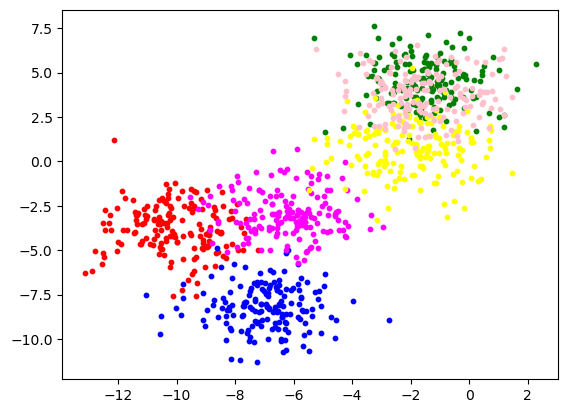

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_classes = 6
data, labels = make_blobs(n_samples=1000,
                          centers=n_classes,
                          cluster_std = 1.3,
                          random_state=1)

colours = ('green', 'red', 'blue', 'magenta', 'yellow', 'pink')

fig, ax = plt.subplots()
for n_class in range(0, n_classes):
    ax.scatter(data[labels==n_class, 0], data[labels==n_class, 1],
               c=colours[n_class], s=10, label=str(n_class))